# Apple Quality Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d nelgiriyewithana/apple-quality

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
100%|█████████████████████████████████████████| 170k/170k [00:00<00:00, 199kB/s]
100%|█████████████████████████████████████████| 170k/170k [00:00<00:00, 199kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Apple Quality Classification/apple-quality.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Apple Quality Classification')
zip_ref.close()

## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('apple_quality.csv')

In [4]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
df.shape

(4001, 9)

In [6]:
df.size

36009

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [10]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4001
Quality           2
dtype: int64

## Data Preprocessing

In [19]:
# Droppping A_id column
df = df.drop('A_id', axis=1)

In [13]:
# Dropping na values

df.dropna(inplace=True)

In [18]:
# Mapping Quality column

df = df.replace({'Quality': {'bad': 0, 'good': 1}})

In [17]:
# Converting acidity data type to float

df = df.astype({'Acidity': 'float'})

In [20]:
X = df.drop('Quality', axis=1)
y = df['Quality']

In [21]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [24]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.75375, 0.7575, 0.90625, 0.90375, 0.76875, 0.87, 0.885, 0.80375, 0.9075]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

Confusion Matrix:
 [[303  98]
 [ 99 300]]


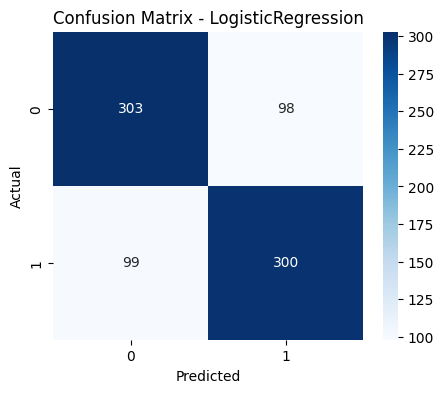

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       401
           1       0.75      0.77      0.76       399

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800

Confusion Matrix:
 [[300 101]
 [ 93 306]]


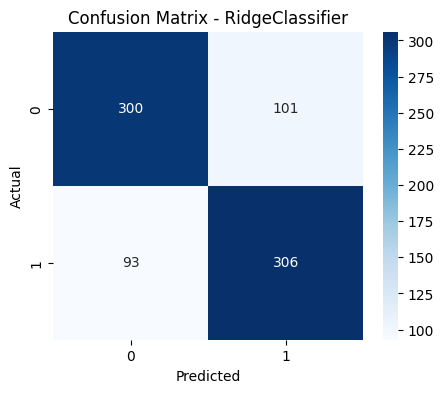

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       401
           1       0.91      0.91      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800

Confusion Matrix:
 [[363  38]
 [ 37 362]]


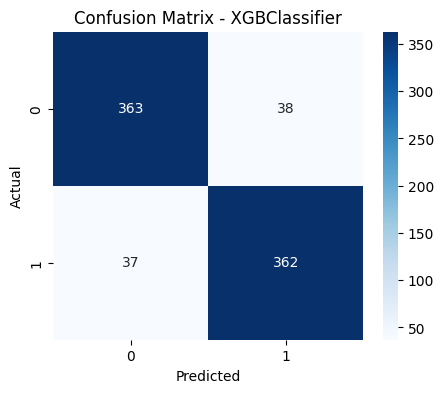

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       401
           1       0.90      0.91      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800

Confusion Matrix:
 [[362  39]
 [ 35 364]]


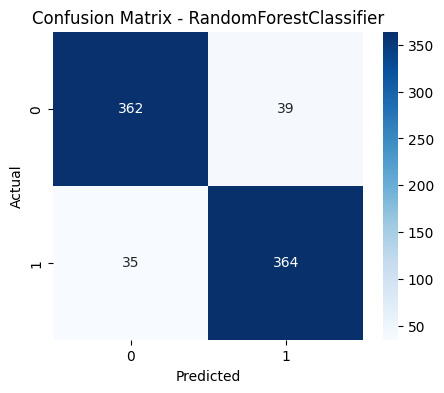

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       401
           1       0.78      0.75      0.76       399

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800

Confusion Matrix:
 [[314  87]
 [ 98 301]]


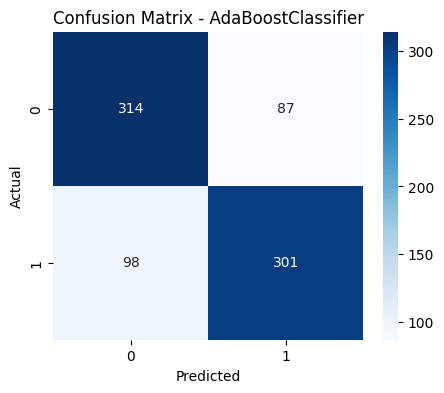

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       401
           1       0.87      0.87      0.87       399

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800

Confusion Matrix:
 [[349  52]
 [ 52 347]]


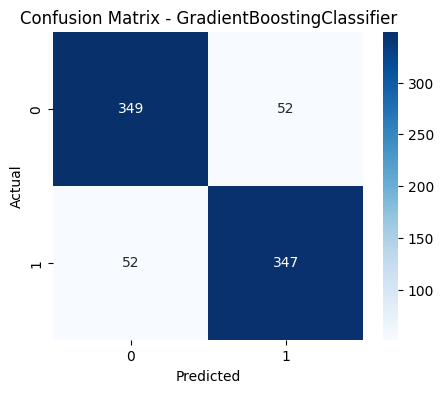

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       401
           1       0.90      0.87      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

Confusion Matrix:
 [[363  38]
 [ 50 349]]


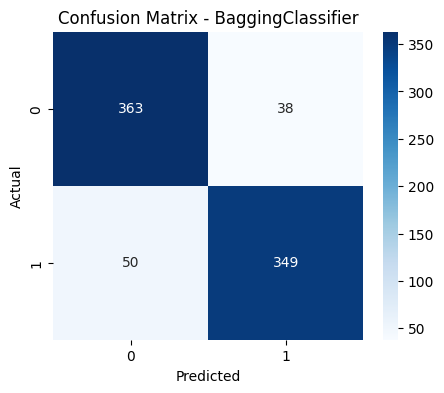

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       401
           1       0.81      0.81      0.81       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800

Confusion Matrix:
 [[327  74]
 [ 77 322]]


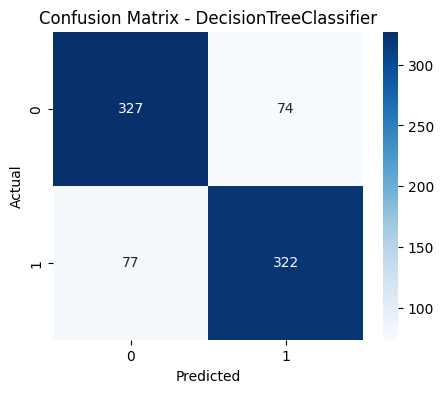

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       401
           1       0.90      0.91      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800

Confusion Matrix:
 [[362  39]
 [ 35 364]]


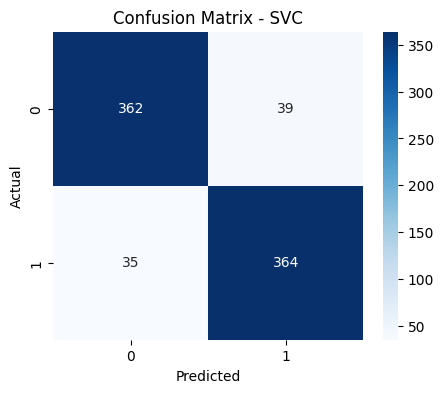

In [26]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()